# Numpy

## 1. Numpy란?
- Numerical Python의 약자로 다차원의 배열과 행렬 연산에 필요한 다양한 함수들을 제공을 한다.
- Memory buffer에 배열을 저장하고 처리하는 효율적인 인터페이스를 제공한다.
- python에서 기존 **_list_** 라는 개념이 존재한다. 그러나 list를 사용하는 것 보다 **_Numpy array_** 객체를 사용하는것이 더 효율적이고 많은 데이터를 빠르게 처리할 수 있다.
- Broadcast가 가능하다.


## 2. Numpy array

In [1]:
import numpy as np

print("numpy version : ", np.__version__) 

numpy version :  1.17.2


버전마다 numpy의 사용법이 다르다. 그래서 보통 코드를 구현할때는 두가지 방법을 사용한다.
- 도커이미지를 만들어서 사용한다.
- 패키지 버전을 재설치한다.

![](./image/numpy_N_array.png)

Numpy에서는 N차원 배열의 데이터 방향을 axis로 지정이 가능합니다.

## 3. Numpy array 생성

In [2]:
import numpy as np

# list로 생성하는 배열
arr_list = [1, 2, 3] 
print("arr_list의 타입 : ", type(arr_list))
print("arr_list의 크기 : ", len(arr_list))

#numpy로 생성하는 배열
arr_numpy = np.array([1, 2, 3])
print("arr_numpy의 타입 : ", type(arr_numpy))
print("arr_numpy의 크기 : ", arr_numpy.shape)

arr_list의 타입 :  <class 'list'>
arr_list의 크기 :  3
arr_numpy의 타입 :  <class 'numpy.ndarray'>
arr_numpy의 크기 :  (3,)


### 3-1. 1차원 배열이지만, [N, 1]로 만들기
##### [1, 2, 3]이 1차원 배열이긴 하지만 shape을 찍어보면 (3, )이런식으로 나오게 된다. 이렇게 되면 이미지 출력도 불가하며 나중에 딥러닝 관련 파이썬 코드를 짤대도 제한적인게 많다.
##### 그래서 여기서는, **_뒤에 1을 붙여주는 방법을 해볼것이다_** --> dim=1 설정

In [3]:
print("arr_numpy의 크기 : ", arr_numpy.shape)
arr_numpy = np.array(arr_numpy).reshape(-1, 1)
print("arr_numpy의 크기 : ", arr_numpy.shape)
print(arr_numpy)

arr_numpy의 크기 :  (3,)
arr_numpy의 크기 :  (3, 1)
[[1]
 [2]
 [3]]


### 3-2. 2차원 배열 만들기
#### 1) 직접 값을 지정하기

In [4]:
arr_numpy = np.array([[1, 2, 3], [4, 5, 6]], dtype='float32')
print(arr_numpy)
print("arr_numpy 타입 : ", type(arr_numpy))
print("arr_numpy 크기 : ", arr_numpy.shape)

[[1. 2. 3.]
 [4. 5. 6.]]
arr_numpy 타입 :  <class 'numpy.ndarray'>
arr_numpy 크기 :  (2, 3)


#### 2) 랜덤하게 값 지정

In [5]:
arr_numpy = np.random.rand(5, 3)
print("arr_numpy 타입 : ", type(arr_numpy))
print("arr_numpy 크기 : ", arr_numpy.shape)
print(arr_numpy)

arr_numpy 타입 :  <class 'numpy.ndarray'>
arr_numpy 크기 :  (5, 3)
[[0.56796183 0.2067896  0.79748959]
 [0.6965158  0.94781443 0.34902608]
 [0.21841004 0.03997646 0.77530683]
 [0.82573369 0.12060541 0.91310266]
 [0.35858601 0.20851982 0.96047578]]


### 3-3. 3차원 배열 만들기

In [6]:
arr_numpy = np.array([[[1, 2, 3], [4, 5, 6], [7, 8, 9]]], dtype='float32')

print(arr_numpy)
print("arr_numpy 타입 : ", type(arr_numpy))
print("arr_numpy 크기 : ", arr_numpy.shape)

[[[1. 2. 3.]
  [4. 5. 6.]
  [7. 8. 9.]]]
arr_numpy 타입 :  <class 'numpy.ndarray'>
arr_numpy 크기 :  (1, 3, 3)


#### 1) shape 변경하기
출력된거 보면 (1, 3, 3)으로 출력된것을 볼 수 있다. 딥러닝에서 이미지 처리를 할때는 보통 (W, H, C)순으로 만들고 처리를 한다. 그래서 여기서는 (1, 3, 3) --> (3, 3, 1)로 만들고 이것을 matplotlib을 이용해서 출력을 해볼것이다.

* 참고로, (3, 3, 1)인 dim=1인 상태에서는 이미지 출력이 불가해서 (3, 3)으로 만들어준 후 출력을 해야한다.

In [7]:
import matplotlib.pyplot as plt

arr_numpy_transpose = np.transpose(arr_numpy, (1, 2, 0))
print(arr_numpy_transpose)
print("arr_numpy 타입 : ", type(arr_numpy_transpose))
print("arr_numpy 크기 : ", arr_numpy_transpose.shape)

[[[1.]
  [2.]
  [3.]]

 [[4.]
  [5.]
  [6.]]

 [[7.]
  [8.]
  [9.]]]
arr_numpy 타입 :  <class 'numpy.ndarray'>
arr_numpy 크기 :  (3, 3, 1)


[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


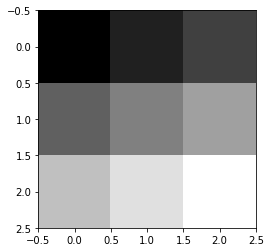

In [8]:
arr_numpy_transpose = arr_numpy_transpose.squeeze()
print(arr_numpy_transpose)
plt.imshow(arr_numpy_transpose, cmap='gray')

## 4. 배열 초기화 후 생성

이 내용은, 처음에 배열을 1이든 0이든 우선 초기화한 후 생성을 해주고 나중에 해당 값에다가 값을 넣어주는 방식이다.

### 4-1. np.zeros()

In [9]:
arr_zeros = np.zeros([3, 4])
print("arr_zeros의 타입 : ", type(arr_zeros))
print("arr_zeros의 크기 : ", arr_zeros.shape)

arr_zeros의 타입 :  <class 'numpy.ndarray'>
arr_zeros의 크기 :  (3, 4)


### 4-2. np.ones()

In [10]:
arr_ones = np.ones([3, 4])
print("arr_ones의 타입 : ", type(arr_ones))
print("arr_ones의 크기 : ", arr_ones.shape)

arr_ones의 타입 :  <class 'numpy.ndarray'>
arr_ones의 크기 :  (3, 4)


### 4-3. np.full()
지정된 shape의 배열을 생성하고 지정해준 값으로 전체 초기화를 해준다.

In [11]:
arr_full_int = np.full([3, 4], 4)
print("arr_full_int의 타입 : ", type(arr_full_int))
print("arr_full_int의 크기 : ", arr_full_int.shape)
print(arr_full_int)

arr_full_int의 타입 :  <class 'numpy.ndarray'>
arr_full_int의 크기 :  (3, 4)
[[4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]]


In [12]:
arr_full_float = np.full([3, 4], 4.)
print("arr_full_float의 타입 : ", type(arr_full_float))
print("arr_full_float의 크기 : ", arr_full_float.shape)
print(arr_full_float)

arr_full_float의 타입 :  <class 'numpy.ndarray'>
arr_full_float의 크기 :  (3, 4)
[[4. 4. 4. 4.]
 [4. 4. 4. 4.]
 [4. 4. 4. 4.]]


### 4-4. np.eye()
(N, N) shape의 단위 행렬(Unit Matrix)생성

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


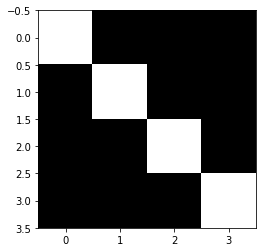

In [13]:
arr_eye = np.eye(4)
print(arr_eye)
plt.imshow(arr_eye, cmap='gray')

### 4-5. np.empty()
배열 값으로 초기화 해주지 않고 지정된 shape 크기로만 배열을 생성.
- 가장 비용이 저렴하고 빠르다.
- 그렇지만, 해당 배열로 다른 값을 넣어줄때 주의해야할 필요가 있다.

In [14]:
arr_empty = np.empty([3, 4])
print(arr_empty)

[[4. 4. 4. 4.]
 [4. 4. 4. 4.]
 [4. 4. 4. 4.]]


### 4-6. np.?_like()

like 함수들은 지정된 np_array의 shape과 같은 배열을 만드는 함수이다.

In [15]:
arr = np.array([[1, 2, 3], [3, 4, 5]], dtype='float32')
arr_zeros = np.zeros_like(arr)
print(arr_zeros)

[[0. 0. 0.]
 [0. 0. 0.]]


In [16]:
arr_ones = np.ones_like(arr)
print(arr_ones)

[[1. 1. 1.]
 [1. 1. 1.]]


In [17]:
arr_full = np.full_like(arr, 5)
print(arr_full)

[[5. 5. 5.]
 [5. 5. 5.]]


In [18]:
arr_empty = np.empty_like(arr)
print(arr_empty)

[[5. 5. 5.]
 [5. 5. 5.]]


## 5. 배열 조건 생성

### 5-1. np.linespace()
- start ~ stop 범위를 가진 num개의 데이터를 균일한 갈격을 갖도록 생성을 한다.

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


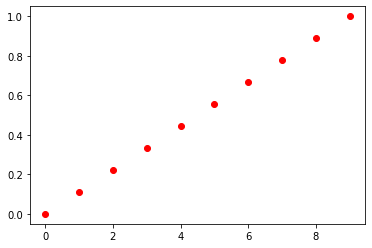

In [19]:
a_lin = np.linspace(0, 1, 10)
print(a_lin)
plt.plot(a_lin, 'ro')

### 5-3. np.arange()
- start ~ stop 미만의 범위를 가진 데이터를 num만큼의 데이터 간격으로 생성을 한다.

[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18.]
arr_arange의 크기 :  [ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18.]


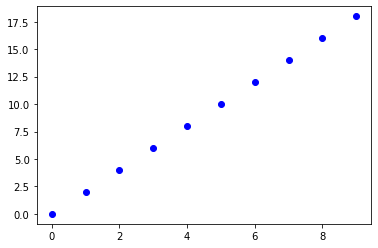

In [20]:
arr_arange = np.arange(0, 20, 2, dtype='float32')
print(arr_arange)
print("arr_arange의 크기 : ", arr_arange)
plt.plot(arr_arange, 'bo')

### 5-4. arr.logspace()
- 우리가 잘 아는 log스케일을 그려주는 함수이다.
- start ~ stop의 범위 내에서 num개의 개수만큼 균일한 간격으로 데이터를 생성한다.

arr_log의 크기 :  (20,)
[ 1.         1.128838   1.274275   1.4384499  1.6237768  1.8329808
  2.069138   2.3357215  2.6366508  2.9763515  3.3598182  3.7926903
  4.2813325  4.83293    5.455595   6.158482   6.951928   7.8475995
  8.858668  10.       ]


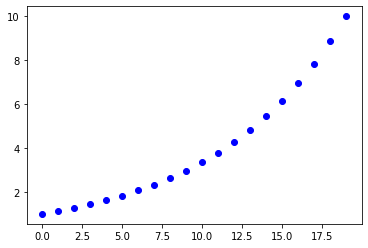

In [21]:
arr_log = np.logspace(0, 1, 20, dtype='float32')
print("arr_log의 크기 : ", arr_log.shape)
print(arr_log)
plt.plot(arr_log, 'bo')

## 6. 난수 배열 생성

### 6-1. np.random.normal
우리가 잘 알고있는 **_가우시안 분포_** 즉, 정규분포 확률 밀도값에서 값을 랜덤하게 추출하는 방법이다.
> np.random.normal(loc = 0.0, scale=1.0, size=none)
>> - loc : 정규 분포의 mean
>> - scale : 표준편차

#### 1) 평균=0, 표준편차=1을 갖는 (3,4)크기의 정규분포를 랜덤하게 뽑아서 도표로 그려보기

arr_normal의 크기 :  (3, 4)
[[-0.3281902   0.75016227  0.69453266 -0.36914267]
 [ 0.49723329 -1.34667087  0.43162071 -0.18678185]
 [ 0.70056558  0.35529406 -0.49011473  0.17924215]]


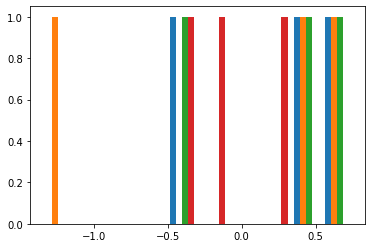

In [22]:
mean = 0
std = 1
arr_normal = np.random.normal(mean, std, (3, 4))
print("arr_normal의 크기 : ", arr_normal.shape)
print(arr_normal)
plt.hist(arr_normal)
plt.show()

#### 2) 평균=0, 표준편차=1을 갖는 분포에서 10000개의 표본을 뽑아서 그려보기

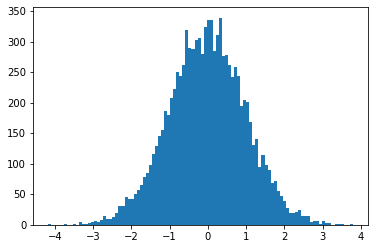

In [23]:
mean = 0
std = 1
arr_normal = np.random.normal(mean, std, 10000)
plt.hist(arr_normal, bins=100)
plt.show()

### 6-2.np.random.rand()
0 ~ 1의 값을 갖는 분포에서 표본을 추출하는 방법.
> Uniform Distribution(= Gaussian Normal Distribution)

[[0.12487971 0.37467625 0.2631511  0.33258783]
 [0.47418631 0.42441382 0.4471422  0.28798782]
 [0.00510995 0.39110345 0.85816438 0.07371965]]


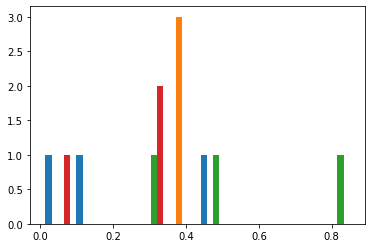

In [24]:
arr_uni = np.random.rand(3, 4)
print(arr_uni)
plt.hist(arr_uni)
plt.show()

(10000,)


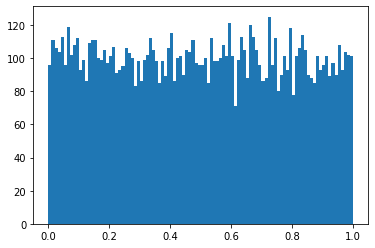

In [25]:
arr_uni = np.random.rand(10000)
print(arr_uni.shape)
plt.hist(arr_uni, bins=100)
plt.show()

### 6-3. np.random.randn()
- 표준 정규 분포(standard normal distribution)에서 표본 추출.
- 종모양이다

In [26]:
arr_randn = np.random.randn(3, 4)
print(arr_randn.shape)
print(arr_randn)

(3, 4)
[[ 0.84430686  0.36976074  0.83197871  1.37953304]
 [ 1.73144248  0.16051718 -0.3210432  -0.15583462]
 [-1.63302271  1.62774137 -1.20277201  2.23077768]]


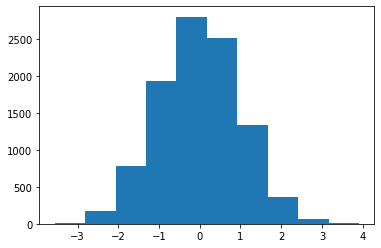

In [27]:
arr_randn = np.random.randn(10000)
plt.hist(arr_randn, bins=10)
plt.show()

### 6-4.np.random.randint
- low ~ high 미만의 범위에서 int형 표본을 추출

In [28]:
arr_int = np.random.randint(2, 10, size=(3, 4))
print(arr_int.shape)
print(arr_int)

(3, 4)
[[7 8 3 5]
 [4 7 7 5]
 [6 3 2 6]]


-1000 ~ 1000사이에서 정수를 균든하게 10000개 표본 추출을 한 결과 균등한 분포를 갖도록 추출하는것을 볼 수 있다.

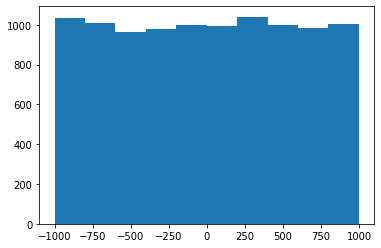

In [29]:
arr_int = np.random.randint(-1000, 1000, 10000)
plt.hist(arr_int, bins=10)
plt.show()